# Model testing

Evaluate the saved XGBoost regressor on the held-out test dataset.

### Imports

In [1]:
import joblib
import numpy as np
import pandas as pd
import os
from pathlib import Path
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt


### Variables

In [2]:
target_col = "movie_score"
drop_cols = ["movie_score", "averageRating", "numVotes", "Unnamed: 0", "_orig_order"]

### Retrieve data

In [3]:
testDatasetPath = os.path.join('..','..', 'data', 'test_dataset.csv')
final_model = joblib.load("Linear_regression.joblib")
df_test = pd.read_csv(testDatasetPath, sep=";")


### Prepare test data

In [4]:
# Load model and data
y_true = df_test[target_col].to_numpy()
y_true_original = np.expm1(y_true)
X_test = df_test.drop(columns=[c for c in drop_cols if c in df_test.columns])


### Create prediction on test

In [5]:
# Predict
y_pred = final_model.predict(X_test)
y_pred_original = np.expm1(y_pred)

/Library/Frameworks/Python.framework/Versions/3.14/lib/python3.14/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


### Calculate MAE, RMSE and R^2

In [6]:
# Metrics (only if ground truth available)
if y_true is not None:
    mae = mean_absolute_error(y_true_original, y_pred_original)
    rmse = np.sqrt(mean_squared_error(y_true_original, y_pred_original))
    r2 = r2_score(y_true, y_pred)
    print(f"MAE:  {mae:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R2:   {r2:.4f}")
else:
    print("Ground-truth 'movie_score' not found in test set; only predictions are available.")


MAE:  1447592847992094720.0000
RMSE: 368212386466791161856.0000
R2:   0.3228


### Create a preview dataframe

In [7]:
# Preview predictions
preview = pd.DataFrame({"predicted_movie_score": y_pred_original, "residual": y_pred_original - y_true_original})
if y_true is not None:
    preview.insert(0, "actual_movie_score", y_true_original)
preview.head()

,actual_movie_score,predicted_movie_score,residual
0,86.0,885.976121,799.976121
1,65407.0,5866.837912,-59540.162088
2,317368.0,26098.403832,-291269.596168
3,16041.0,1309.783411,-14731.216589
4,406841.0,13194.671556,-393646.328444


### Graph over residuals

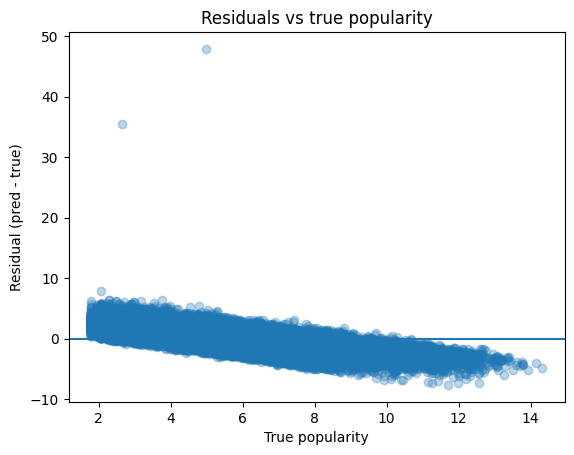

In [8]:
residuals = y_pred - y_true

plt.figure()
plt.scatter(y_true, residuals, alpha=0.3)
plt.axhline(0)
plt.xlabel("True popularity")
plt.ylabel("Residual (pred - true)")
plt.title("Residuals vs true popularity")
plt.show()


### Bias plot

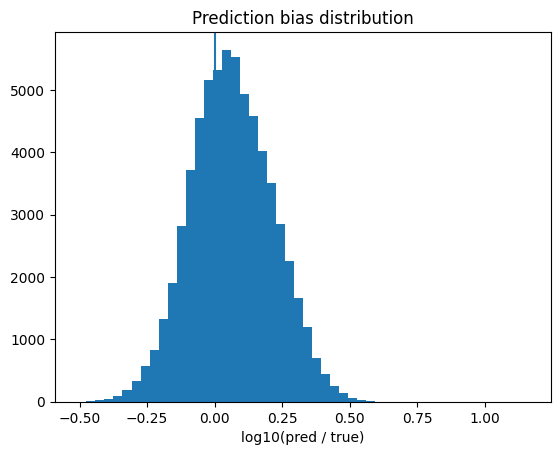

In [9]:
ratio = y_pred / (y_true + 1e-9)
plt.figure()
plt.hist(np.log10(ratio), bins=50)
plt.axvline(0)  # log10(1)
plt.xlabel("log10(pred / true)")
plt.title("Prediction bias distribution")
plt.show()

